# Game Of Thrones 

Game of Thrones is an HBO series that tells the story of a medieval country's civil war. The series, which premiered in April 2011, is set on the fictional continents of Westeros and Essos in a world where seasons stretch on for years. When the story begins, a decade-long summer is ending, and winter looms as characters battle to claim the "Iron Throne," the seat of the king of the Seven Kingdoms, the regime that rules all but the northern tip of Westeros. In show parlance, "sit on the Iron Throne" is a metonym equivalent to "rule Westeros."

![title](got.jpg)

### Import modules and datasets 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [86]:
got_characters = pd.read_csv('characters_v4.csv')

In [4]:
got_characters.head()

,Season,Episode,Title,Release_date,Rating,Votes,Summary,Writer_1,Writer_2,Star_1,Star_2,Star_3,Users_reviews,Critics_reviews,US_Viewers,Duration,Director,Budget_estimate
0,1,1,Winter Is Coming,17-Apr-11,9.1,38639,Eddard Stark is torn between his family and an...,David Benioff,D.B. Weiss,Sean Bean,Mark Addy,Nikolaj Coster-Waldau,61,30,2.22,62,Timothy Van Patten,0
1,1,2,The Kingsroad,24-Apr-11,8.8,29285,"While Bran recovers from his fall, Ned takes o...",David Benioff,D.B. Weiss,Sean Bean,Mark Addy,Nikolaj Coster-Waldau,27,28,2.20,56,Timothy Van Patten,0
2,1,3,Lord Snow,1-May-11,8.7,27694,Jon begins his training with the Night's Watch...,David Benioff,D.B. Weiss,Sean Bean,Mark Addy,Nikolaj Coster-Waldau,21,29,2.44,58,Brian Kirk,0
3,1,4,"Cripples, Bastards, and Broken Things",8-May-11,8.8,26284,Eddard investigates Jon Arryn's murder. Jon be...,David Benioff,D.B. Weiss,Sean Bean,Mark Addy,Nikolaj Coster-Waldau,22,26,2.45,56,Brian Kirk,0
4,1,5,The Wolf and the Lion,15-May-11,9.1,27349,Catelyn has captured Tyrion and plans to bring...,David Benioff,D.B. Weiss,Sean Bean,Mark Addy,Nikolaj Coster-Waldau,24,26,2.58,55,Brian Kirk,0


In [6]:
got_characters.describe()

,Season,Episode,Rating,Votes,Users_reviews,Critics_reviews,US_Viewers,Duration,Budget_estimate
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,4.205479,5.191781,8.839726,47789.506849,293.260274,37.342466,6.447808,57.726027,0.0
std,2.191897,2.821827,0.931358,44738.792481,1075.827434,12.861678,2.827372,7.251935,0.0
min,1.000000,1.000000,4.100000,22223.000000,13.000000,24.000000,2.200000,50.000000,0.0
25%,2.000000,3.000000,8.700000,23734.000000,19.000000,27.000000,3.900000,53.000000,0.0
50%,4.000000,5.000000,8.900000,29302.000000,28.000000,32.000000,6.640000,56.000000,0.0
75%,6.000000,7.000000,9.400000,42207.000000,58.000000,46.000000,7.820000,59.000000,0.0
max,8.000000,10.000000,9.900000,220581.000000,7358.000000,71.000000,13.610000,82.000000,0.0


In [55]:
got_characters = got_characters.drop("Budget_estimate", axis=1)

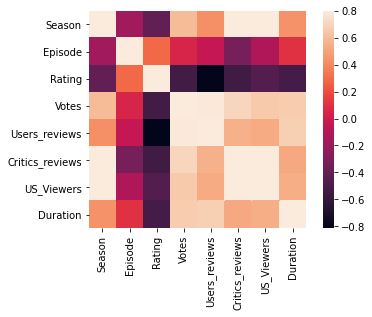

In [56]:
corrmat = got_characters.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=.8, square=True);

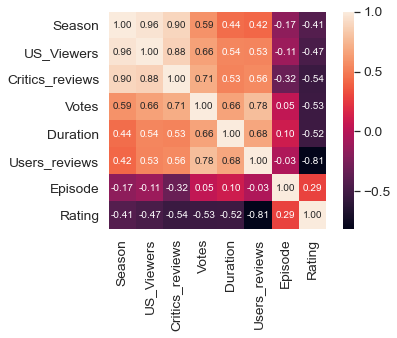

In [58]:
#season correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Season')['Season'].index
cm = np.corrcoef(got_characters[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

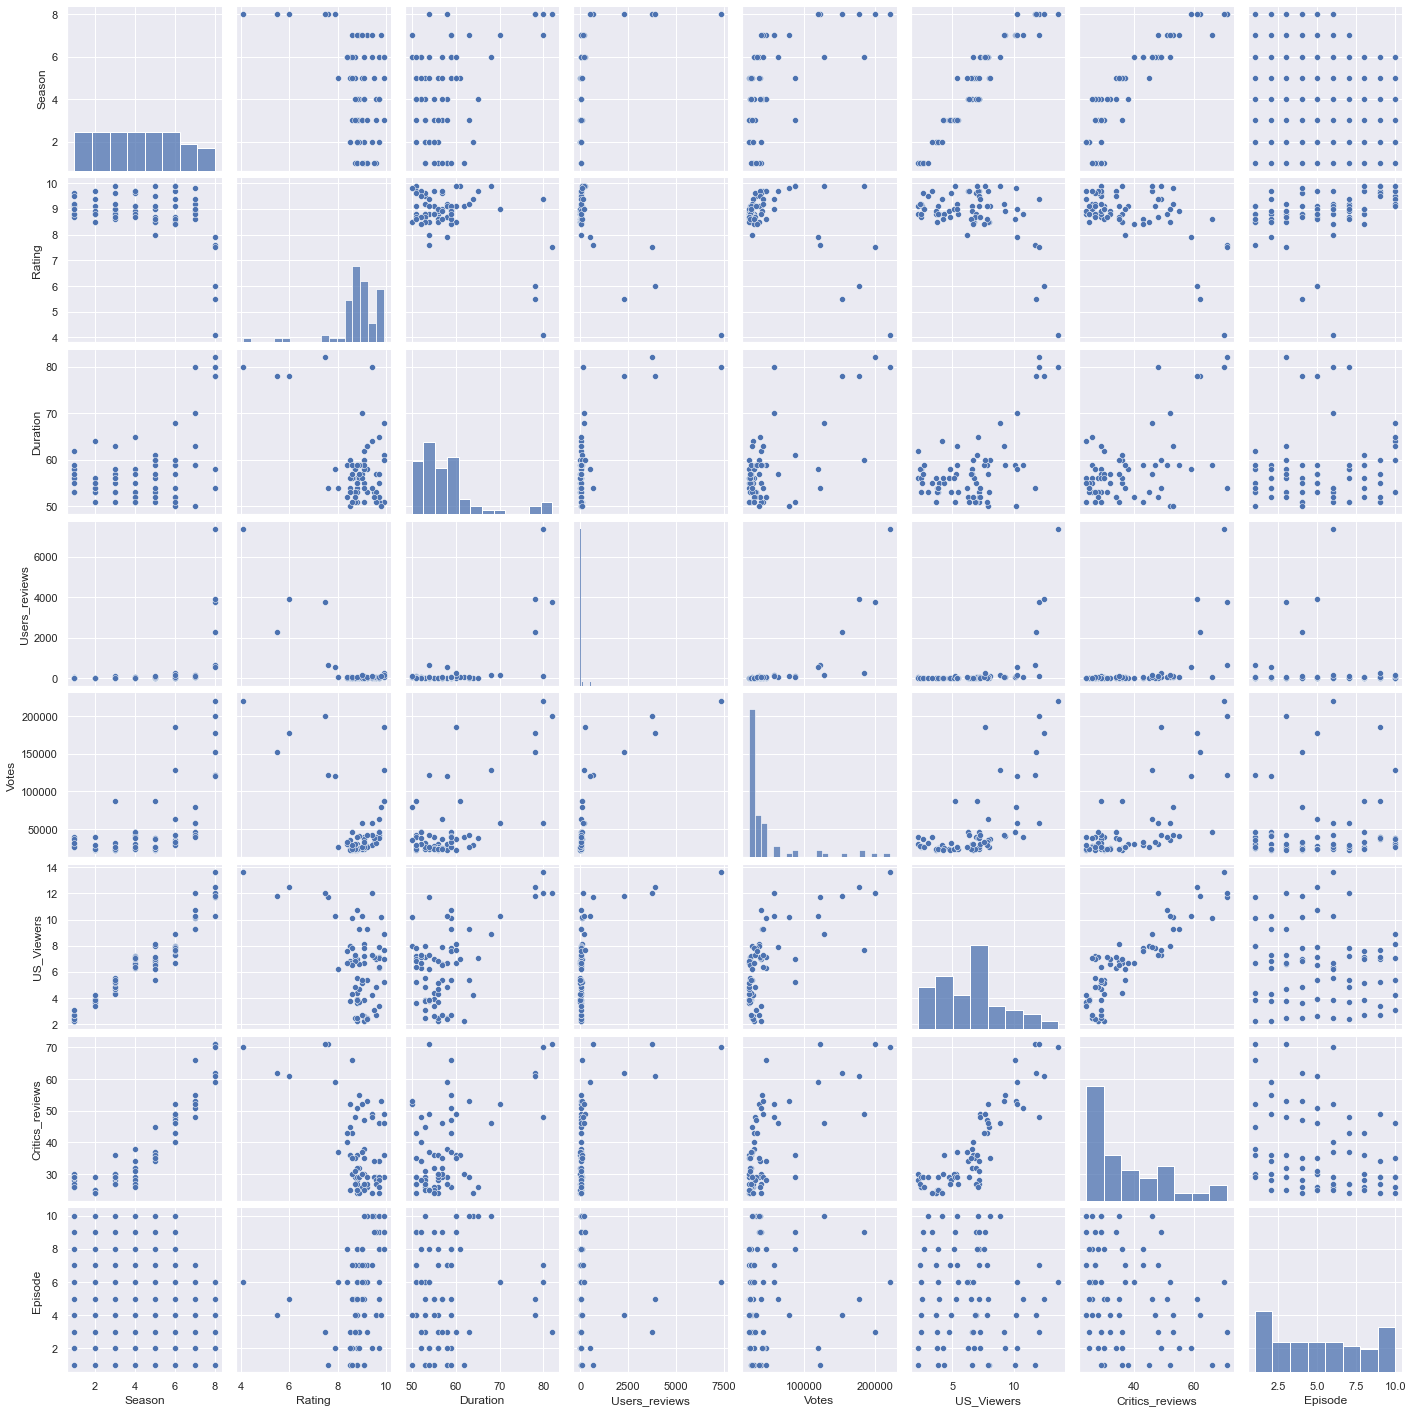

In [83]:
#scatterplot
cols = ['Season', 'Rating', 'Duration', 'Users_reviews', 'Votes', 'US_Viewers', 'Critics_reviews', 'Episode']
sns.pairplot(got_characters[cols], height = 2.5)
plt.show();

In [82]:
#lets see which season got the most number of votes
got_season_votes = got_characters.groupby('Season').Votes.sum().to_frame().reset_index()

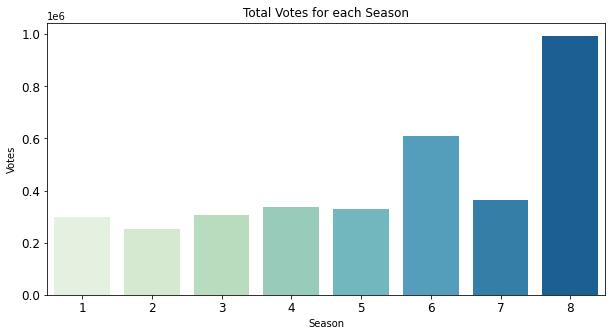

In [9]:
#plot image
plt.figure(figsize=(10,5))
sns.barplot(x=got_season_votes.Season, y = got_season_votes.Votes, palette = 'GnBu')
plt.title('Total Votes for each Season')
plt.xlabel('Season')
plt.ylabel('Votes')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [11]:
#Total duration of season
got_season_duration = got_characters.groupby('Season').Duration.sum().to_frame().reset_index()


(300.0, 600.0)

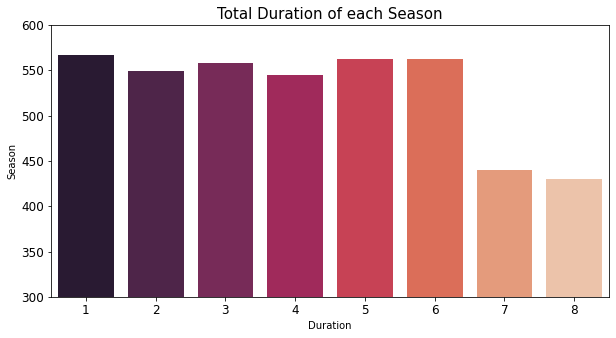

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=got_season_duration.Season, y=got_season_duration.Duration, palette='rocket')
plt.title('Total Duration of each Season', fontsize=15)
plt.xlabel('Duration')
plt.ylabel('Season')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(300, 600)

In [20]:
#average rating per season
got_season_rating = got_characters.groupby('Season').mean().Rating.to_frame().reset_index()

(5.0, 10.0)

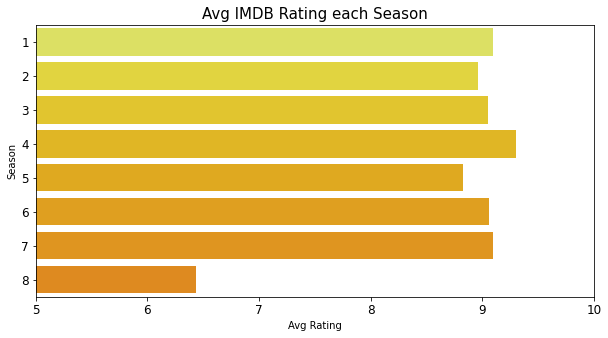

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(y=got_season_rating.Season, x=got_season_rating.Rating, palette='Wistia', orient='h')
plt.title('Avg IMDB Rating each Season', fontsize=15)
plt.xlabel('Avg Rating')
plt.ylabel('Season')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(5, 10)

In [84]:
#rating earned by each director 
got_characters_directors = got_characters.groupby('Director').Rating.sum().to_frame().reset_index()

Text(0, 0.5, 'Directors')

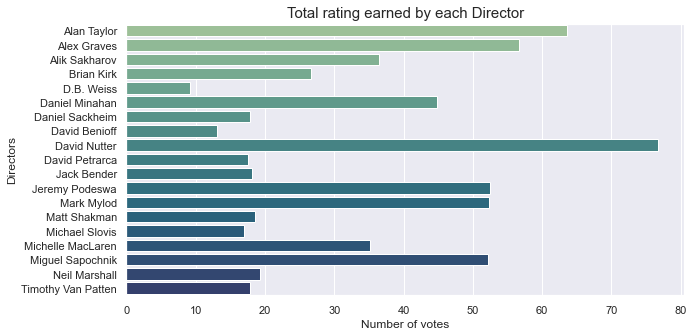

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x=got_characters_directors.Rating, y=got_characters_directors.Director, palette='crest', orient='h')
plt.title('Total rating earned by each Director', fontsize=15)
plt.xlabel('Number of votes')
plt.ylabel('Directors')

In [44]:
#top 15 high-rated episodes
got_season_pop_epi = got_characters[['Title', 'Rating']].sort_values('Rating', ascending=False).head(15).reset_index(drop=True)

(9.0, 10.0)

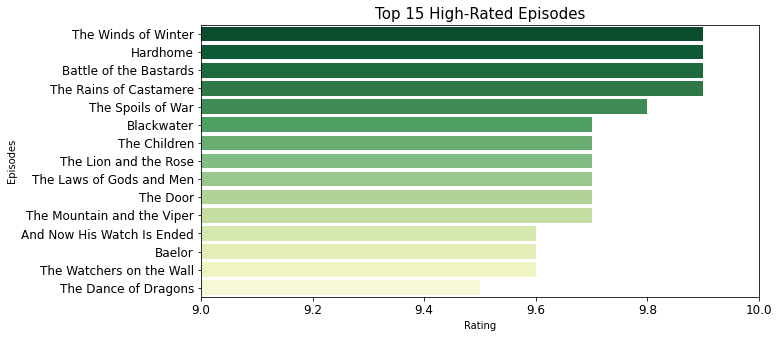

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(y=got_season_pop_epi.Title, x=got_season_pop_epi.Rating, orient='h', palette='YlGn_r')
plt.title('Top 15 High-Rated Episodes', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Episodes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(9, 10)